In [1]:
import os
import sys
import numpy as np
import pandas as pd

import torch
sys.path.append("..") 


In [2]:

def find_common_images(file_paths):
    image_lists = []
    common_images = {}

    # Read each file and extract the image names
    for file_path in file_paths:
        with open(file_path, 'r') as file:
            
            image_list = file.read().splitlines()
            image_list = [k.split(',')[0] for k in image_list]
            image_list = image_list[1:]
            image_lists.append(set(image_list))
            

    # Find common images and count occurrences
    for i in range(len(image_lists)):
        for j in range( len(image_lists)):
            common_images_count = len(image_lists[i].intersection(image_lists[j]))
            file1_name = file_paths[i]
            file2_name = file_paths[j]
            common_images[(file1_name, file2_name)] = common_images_count

    return common_images


In [3]:
test_ds = '/home/valerie/Projects/Alps_LCC/data/split/test_dataset.csv'
train_ds = '/home/valerie/Projects/Alps_LCC/data/split/train_dataset.csv'
val_ds = '/home/valerie/Projects/Alps_LCC/data/split/val_dataset.csv'

In [4]:
test_sub ='/home/valerie/Projects/Alps_LCC/data/split_subset/test_subset.csv'
train_sub = '/home/valerie/Projects/Alps_LCC/data/split_subset/train_subset.csv'
train_sub_few = '/home/valerie/Projects/Alps_LCC/data/split_subset/train_subset_few.csv'
val_sub = '/home/valerie/Projects/Alps_LCC/data/split_subset/val_subset.csv'

In [5]:


file_paths = [test_ds,train_ds, val_ds, train_sub,train_sub_few,val_sub,test_sub]
common_images = find_common_images(file_paths)

if common_images:
    print("Common images:")
    for files, count in common_images.items():
        file1_name, file2_name = files
        
        print(f"{file1_name.split('/')[-1]} \t\tand {file2_name.split('/')[-1]}:\t\t {count} common images")
else:
    print("No common images found.")


Common images:
test_dataset.csv 		and test_dataset.csv:		 45907 common images
test_dataset.csv 		and train_dataset.csv:		 0 common images
test_dataset.csv 		and val_dataset.csv:		 0 common images
test_dataset.csv 		and train_subset.csv:		 0 common images
test_dataset.csv 		and train_subset_few.csv:		 0 common images
test_dataset.csv 		and val_subset.csv:		 0 common images
test_dataset.csv 		and test_subset.csv:		 4590 common images
train_dataset.csv 		and test_dataset.csv:		 0 common images
train_dataset.csv 		and train_dataset.csv:		 137721 common images
train_dataset.csv 		and val_dataset.csv:		 0 common images
train_dataset.csv 		and train_subset.csv:		 13772 common images
train_dataset.csv 		and train_subset_few.csv:		 13772 common images
train_dataset.csv 		and val_subset.csv:		 0 common images
train_dataset.csv 		and test_subset.csv:		 0 common images
val_dataset.csv 		and test_dataset.csv:		 0 common images
val_dataset.csv 		and train_dataset.csv:		 0 common images
val_dataset.c

In [6]:
import matplotlib.pyplot as plt
import numpy as np


In [7]:
list(common_images.keys())[0]

('/home/valerie/Projects/Alps_LCC/data/split/test_dataset.csv',
 '/home/valerie/Projects/Alps_LCC/data/split/test_dataset.csv')

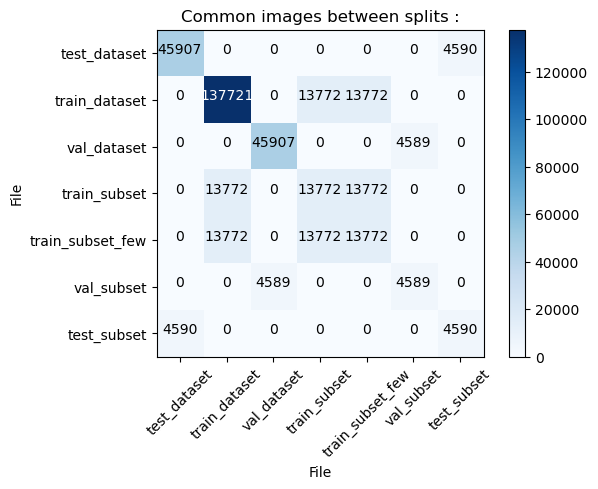

In [8]:

# Create a matrix to store the co-occurrence counts
num_files = len(file_paths)
matrix = np.zeros((7, 7), dtype=int)
legends = [x.split('/')[-1].replace('.csv','') for x in file_paths] 

key_to_idx = {fp:idx for idx,fp in enumerate(file_paths)}
key_to_idx

for key in list(common_images.keys()):
    value = common_images[key]
    fp1,fp2 = key
    i= key_to_idx[fp1]
    j = key_to_idx[fp2]
    matrix[i, j] = matrix[j, i] = value

# Create the confusion matrix plot
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Common images between splits :')
plt.colorbar()
tick_marks = np.arange(num_files)
plt.xticks(tick_marks, legends, rotation=45)
plt.yticks(tick_marks, legends)
plt.tight_layout()
plt.ylabel('File')
plt.xlabel('File')

# Add the count values to the plot
for i in range(num_files):
    for j in range(num_files):
        plt.text(j, i, matrix[i, j], horizontalalignment="center",
                    color="white" if matrix[i, j] > np.max(matrix) / 2 else "black")

# Display the plot
plt.show()
